In [51]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from data.load_data_from_sql import connect_to_database, read_sql_to_dataframe, close_connection
from scripts.cleaner import DataCleaner
from scripts.utils import Utils

cleaner = DataCleaner()
utility = Utils()
%matplotlib inline

In [8]:
# Function to add the project path to sys.path
def add_project_path():
    """Add the project path to sys.path."""
    project_path = 'C:\\Users\\user\\Desktop\\10 acc\\Week 1\\User-Analytics-in-Telecom-Industry'
    sys.path.append(project_path)

In [9]:
# Function to perform the main analysis
def main_analysis():
    """Main function to execute your analysis."""
    # Add the project path to sys.path
    add_project_path()

    db_params = {
        'dbname': 'week-1',
        'user': 'postgres',
        'password': 'postgres',
        'host': 'localhost',
        'port': '5432',
    }

    # Example query
    query = "SELECT * FROM cleaned_telecom_data;"

    # Connect to the database
    conn = connect_to_database(db_params)

    # Read results into a Pandas DataFrame
    cleaned_df = read_sql_to_dataframe(conn, query)

    # Close the database connection
    close_connection(conn)


    # return the DataFrame
    return cleaned_df

In [10]:
# Call the main analysis function
cleaned_df = main_analysis()
cleaned_df.head()

C:\Users\user\Desktop\10 acc\Week 1\User-Analytics-in-Telecom-Industry\data\load_data_from_sql.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  float64       
 1   start                                     150001 non-null  datetime64[ns]
 2   start_ms                                  150001 non-null  float64       
 3   end                                       150001 non-null  datetime64[ns]
 4   end_ms                                    150001 non-null  float64       
 5   dur._(ms)                                 150001 non-null  float64       
 6   imsi                                      150001 non-null  float64       
 7   msisdn/number                             150001 non-null  float64       
 8   imei                                      150001 non-null  float64       
 9   last_location_n

In [12]:
cleaned_df.isnull().sum()

bearer_id                                   0
start                                       0
start_ms                                    0
end                                         0
end_ms                                      0
dur._(ms)                                   0
imsi                                        0
msisdn/number                               0
imei                                        0
last_location_name                          0
avg_rtt_dl_(ms)                             0
avg_rtt_ul_(ms)                             0
avg_bearer_tp_dl_(kbps)                     0
avg_bearer_tp_ul_(kbps)                     0
tcp_dl_retrans._vol_(bytes)                 0
tcp_ul_retrans._vol_(bytes)                 0
dl_tp_<_50_kbps_(%)                         0
50_kbps_<_dl_tp_<_250_kbps_(%)              0
250_kbps_<_dl_tp_<_1_mbps_(%)               0
dl_tp_>_1_mbps_(%)                          0
ul_tp_<_10_kbps_(%)                         0
10_kbps_<_ul_tp_<_50_kbps_(%)     

### Task 2

In [13]:
# top 10 handsets used by the customers
cleaned_df["handset_type"].value_counts().head(10)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: handset_type, dtype: int64

In [14]:
# using 'cleaned_df' DataFrame and 'handset_type' column
top_handsets = cleaned_df["handset_type"].value_counts().head(10)

# Creating a DataFrame from the series
top_handsets_df = top_handsets.reset_index()
top_handsets_df.columns = ['Handset Type', 'Count']

# Creating an interactive bar plot using Plotly Express
fig = px.bar(top_handsets_df, x='Handset Type', y='Count', title='Top 10 Handsets Used',
             labels={'Count': 'Number of Users', 'Handset Type': 'Handset Type'},
             color='Count', color_continuous_scale=px.colors.sequential.Viridis)

# Displaying the plot
fig.show()


In [15]:
# top 3 handset manufacturers
cleaned_df["handset_manufacturer"].value_counts().head(3)

Apple      60137
Samsung    40839
Huawei     34423
Name: handset_manufacturer, dtype: int64

In [16]:
# using 'cleaned_df' DataFrame and 'handset_manufacturer' column
top_manufacturers = cleaned_df["handset_manufacturer"].value_counts().head(3)

# Creating a DataFrame from the series
top_manufacturers_df = top_manufacturers.reset_index()
top_manufacturers_df.columns = ['Manufacturer', 'Count']

# Creating an interactive pie chart using Plotly Express
fig = px.pie(top_manufacturers_df, values='Count', names='Manufacturer', title='Top 3 Handset Manufacturers')

# Displaying the plot
fig.show()

In [17]:
# top 5 handsets per top 3 handset manufacturer
handsets_per_manufacturers=cleaned_df[cleaned_df["handset_manufacturer"].str.contains("Apple|Samsung|Huawei") ][["handset_manufacturer","handset_type"]]
handsets_per_manufacturers

,handset_manufacturer,handset_type
0,Samsung,Samsung Galaxy A5 Sm-A520F
1,Samsung,Samsung Galaxy J5 (Sm-J530)
2,Samsung,Samsung Galaxy A8 (2018)
4,Samsung,Samsung Sm-G390F
6,Huawei,Huawei Mate 20 Lite
...,...,...
149996,Apple,Apple iPhone 8 Plus (A1897)
149997,Apple,Apple iPhone Se (A1723)
149998,Apple,Apple iPhone Xs (A2097)
149999,Huawei,Huawei Fig-Lx1


In [18]:
list(handsets_per_manufacturers.groupby(["handset_manufacturer"]))[0][1]["handset_type"].value_counts().head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_3076\3955900147.py:1: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: handset_type, dtype: int64

In [19]:
list(handsets_per_manufacturers.groupby(["handset_manufacturer"]))[1][1]["handset_type"].value_counts().head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_3076\1670706610.py:1: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: handset_type, dtype: int64

In [20]:
list(handsets_per_manufacturers.groupby(["handset_manufacturer"]))[2][1]["handset_type"].value_counts().head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_3076\2986698792.py:1: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: handset_type, dtype: int64

In [21]:
# using'handsets_per_manufacturers' DataFrame and 'handset_manufacturer' and 'handset_type' columns
manufacturers = handsets_per_manufacturers["handset_manufacturer"].value_counts().head(3).index

# Creating subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=(manufacturers))

# Plotting the top 5 handset types for each manufacturer
for i, manufacturer in enumerate(manufacturers):
    manufacturer_df = handsets_per_manufacturers[handsets_per_manufacturers["handset_manufacturer"] == manufacturer]
    top_handsets = manufacturer_df["handset_type"].value_counts().head(5)
    
    # Creating a DataFrame from the series
    top_handsets_df = top_handsets.reset_index()
    top_handsets_df.columns = ['Handset Type', 'Count']
    
    # Creating a bar trace for each manufacturer
    trace = go.Bar(x=top_handsets_df['Handset Type'], y=top_handsets_df['Count'], name=manufacturer)
    
    # Adding the trace to the subplot
    fig.add_trace(trace, row=1, col=i+1)

# Updating the layout
fig.update_layout(title_text="Top 5 Handset Types for Each Manufacturer", showlegend=False)

# Displaying the plot
fig.show()

#### Interpretation

In examining the data, it's evident that certain handsets hold a significant sway over customer preferences, with a distinct focus on the top 10 handsets. For market teams, this implies an opportunity to hone in on these popular devices, tailoring marketing efforts to leverage their widespread appeal. Promotions or exclusive deals bundled with these top handsets could attract a broader customer base. Furthermore, understanding the dominant handset manufacturers, as revealed by the top 3 manufacturers, opens avenues for strategic collaborations. Market teams can explore partnerships with these manufacturers to enhance product offerings, potentially leading to exclusive releases or features that set their offerings apart in a competitive market.

Delving deeper into the dataset by examining the top 5 handset types for each manufacturer offers a nuanced perspective. Customizing marketing campaigns for each manufacturer based on the most popular handset types allows for a more targeted and effective approach. By aligning promotions with the preferences of each manufacturer's customer base, market teams can better connect with potential buyers. Additionally, staying attuned to the release schedules and innovations of these manufacturers becomes crucial for maintaining competitiveness in a dynamic market. This comprehensive understanding of customer preferences, coupled with strategic collaborations and tailored marketing efforts, positions the market teams to not only meet current demands but also anticipate and adapt to evolving trends.

#### Recommendation to marketing teams

Collaborating with the top handset manufacturers presents an opportunity to create mutually beneficial relationships. Consideration should be given to exclusive deals or promotions that highlight both the handsets and the services offered by the company. These partnerships could extend to co-branded marketing campaigns, maximizing brand visibility and fostering a sense of trust and loyalty among customers.

The data also suggests a need for customized marketing campaigns that cater to the unique preferences of each manufacturer's customer base. Rather than adopting a one-size-fits-all approach, tailoring promotions to the top 5 handset types for each manufacturer ensures a more resonant message. This approach not only improves customer engagement but also positions the company as attuned to individual customer needs. Additionally, as the market is dynamic, a vigilant eye on emerging trends and innovations from the top manufacturers is crucial. By staying ahead of the curve, market teams can proactively adjust strategies, ensuring that their offerings remain aligned with evolving customer expectations and preferences.

### Task 2.1

#### overview of the users’ behaviour

#### number of xDR session

In [22]:
session=cleaned_df.groupby(["msisdn/number"]).agg({"bearer_id":"count"})

session.rename(columns={"bearer_id":"xDR_sessions"})
session=pd.DataFrame(data=list(session["bearer_id"])[1:],columns=["xDR_session"],index=session.index[1:])
session = session.sort_values(by=["xDR_session"],ascending=False)
session.dropna()
session.head(10)

,xDR_session
msisdn/number,
3.366371e+10,1067
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.360452e+10,12


In [23]:
session.describe()

,xDR_session
count,106855.000000
mean,1.403771
std,3.358032
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1067.000000


we have an average of ≈ 1.4 xDR session per user.

#### total session duration

In [24]:
# duration with ms
cleaned_df[["dur._(ms)"]]

,dur._(ms)
0,1823652.0
1,1365104.0
2,1361762.0
3,1321509.0
4,1089009.0
...,...
149996,81230.0
149997,97970.0
149998,98249.0
149999,97910.0


In [25]:
duration = cleaned_df.groupby(["msisdn/number"]).agg({"dur._(ms)":"sum"})
duration.sort_values(by=["dur._(ms)"],ascending=False,inplace=True)
duration.dropna(axis=0,inplace=True)
duration=duration.rename(columns={"dur._(ms)":"total_duration(ms) "})
duration.head(10)

,total_duration(ms)
msisdn/number,
3.366371e+10,72655568.0
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0


In [26]:
duration.describe()

,total_duration(ms)
count,1.068560e+05
mean,1.468459e+05
std,2.897108e+05
min,7.142000e+03
25%,7.130800e+04
50%,1.027400e+05
75%,1.727990e+05
max,7.265557e+07


we can see that on average a user spent around 146846 ms (146.8 s) on xDR session

#### total download(DL) and upload (UL) data

In [27]:
# our target columns
cleaned_df[["total_dl_(bytes)","total_ul_(bytes)"]]

,total_dl_(bytes),total_ul_(bytes)
0,3.088796e+08,3.674974e+07
1,6.533850e+08,5.380039e+07
2,2.798073e+08,2.788364e+07
3,8.460285e+08,4.332422e+07
4,5.691386e+08,3.854281e+07
...,...,...
149996,5.741753e+08,5.762885e+07
149997,6.666488e+08,3.913508e+07
149998,5.927864e+08,3.491222e+07
149999,3.718959e+08,2.962610e+07


In [28]:
ul_dl_data=cleaned_df.groupby(["msisdn/number"]).agg({"total_dl_(bytes)":"sum","total_ul_(bytes)":"sum"})
ul_dl_data.dropna(axis=0,inplace=True)
ul_dl_data[["total_dl_(MB)","total_ul_(MB)"]]=ul_dl_data[["total_dl_(bytes)","total_ul_(bytes)"]].div(1024**2)
ul_dl_data=ul_dl_data.sort_values(by=["total_dl_(bytes)","total_ul_(bytes)"],ascending=False)
ul_dl_data.head(10)

,total_dl_(bytes),total_ul_(bytes),total_dl_(MB),total_ul_(MB)
msisdn/number,,,,
3.366371e+10,4.875441e+11,4.441823e+10,464958.288934,42360.529887
3.361489e+10,8.156743e+09,6.894830e+08,7778.876775,657.542230
3.376054e+10,7.811295e+09,7.034786e+08,7449.431784,670.889455
3.362578e+10,7.770043e+09,7.295774e+08,7410.090773,695.779209
3.367588e+10,7.309542e+09,5.815688e+08,6970.922295,554.627220
3.362632e+10,7.301517e+09,6.696507e+08,6963.268795,638.628694
3.365973e+10,7.081602e+09,6.242603e+08,6753.542387,595.341035
3.366646e+10,6.903440e+09,4.050610e+08,6583.633387,386.296249
3.376041e+10,6.610852e+09,5.215189e+08,6304.599403,497.359171


In [29]:
ul_dl_data.describe()

,total_dl_(bytes),total_ul_(bytes),total_dl_(MB),total_ul_(MB)
count,1.068560e+05,1.068560e+05,106856.000000,106856.000000
mean,6.382138e+08,5.772462e+07,608.648068,55.050488
std,1.560293e+09,1.403131e+08,1488.010937,133.812991
min,8.827082e+06,2.866892e+06,8.418161,2.734081
25%,3.148323e+08,3.639547e+07,300.247463,34.709430
50%,5.703738e+08,4.679387e+07,543.950803,44.626108
75%,8.073704e+08,6.573405e+07,769.968404,62.688872
max,4.875441e+11,4.441823e+10,464958.288934,42360.529887


From the above data we can understand that the average data size downloaded by a user is 608.6MB while the average data size uploaded by a user is 55MB

#### total data volume (bytes) during the session for each application

In [30]:
total_data_volume = cleaned_df.groupby(["msisdn/number"]).agg({
    "email_dl_(bytes)": "sum",
    "email_ul_(bytes)": "sum",
    "gaming_dl_(bytes)": "sum",
    "gaming_ul_(bytes)": "sum",
    "google_dl_(bytes)": "sum",
    "google_ul_(bytes)": "sum",
    "netflix_dl_(bytes)": "sum",
    "netflix_ul_(bytes)": "sum",
    "other_dl_(bytes)": "sum",
    "other_ul_(bytes)": "sum",
    "social_media_dl_(bytes)": "sum",
    "social_media_ul_(bytes)": "sum",
    "youtube_dl_(bytes)": "sum",
    "youtube_ul_(bytes)": "sum",
    "total_dl_(bytes)": "sum",
    "total_ul_(bytes)": "sum"
})[["email_dl_(bytes)","email_ul_(bytes)","gaming_dl_(bytes)","gaming_ul_(bytes)","google_dl_(bytes)","google_ul_(bytes)","netflix_dl_(bytes)","netflix_ul_(bytes)","other_dl_(bytes)","other_ul_(bytes)","social_media_dl_(bytes)","social_media_ul_(bytes)","youtube_dl_(bytes)","youtube_ul_(bytes)","total_dl_(bytes)","total_ul_(bytes)"]]

total_data_volume["email"]=total_data_volume["email_dl_(bytes)"] + total_data_volume["email_ul_(bytes)"]
total_data_volume["gaming"]=total_data_volume["gaming_dl_(bytes)"] + total_data_volume["gaming_ul_(bytes)"]
total_data_volume["google"]=total_data_volume["google_dl_(bytes)"] + total_data_volume["google_ul_(bytes)"]
total_data_volume["netflix"]=total_data_volume["netflix_dl_(bytes)"] + total_data_volume["netflix_ul_(bytes)"]
total_data_volume["social_media"]=total_data_volume["social_media_dl_(bytes)"] + total_data_volume["social_media_ul_(bytes)"]
total_data_volume["youtube"]=total_data_volume["youtube_dl_(bytes)"] + total_data_volume["youtube_ul_(bytes)"]
total_data_volume["other"]=total_data_volume["other_dl_(bytes)"] + total_data_volume["other_ul_(bytes)"]
total_data_volume["total"]=total_data_volume["total_dl_(bytes)"] + total_data_volume["total_ul_(bytes)"]

total_data_volume=total_data_volume[["email","gaming","google","netflix","social_media","youtube","other","total"]]
total_data_volume.sort_values(by=["total"],ascending=False,inplace=True)
total_data_volume.dropna(axis=0,inplace=True)
total_data_volume


,email,gaming,google,netflix,social_media,youtube,other,total
msisdn/number,,,,,,,,
3.366371e+10,2.403622e+09,4.616346e+11,8.250702e+09,2.428211e+10,1.974199e+09,2.435073e+10,4.516521e+11,5.319623e+11
3.361489e+10,4.078863e+07,7.749432e+09,1.279738e+08,3.614010e+08,2.829454e+07,3.943702e+08,7.639264e+09,8.846226e+09
3.376054e+10,3.369377e+07,7.461045e+09,1.232231e+08,3.346433e+08,3.978319e+07,3.962892e+08,4.716134e+09,8.514774e+09
3.362578e+10,4.063397e+07,7.326673e+09,1.423079e+08,3.569806e+08,2.713550e+07,4.529588e+08,6.354583e+09,8.499621e+09
3.362632e+10,4.241878e+07,6.887572e+09,1.521919e+08,3.287257e+08,4.337478e+07,3.744830e+08,8.167878e+09,7.971167e+09
...,...,...,...,...,...,...,...,...
3.367548e+10,7.534170e+05,5.847338e+06,1.609008e+06,4.610190e+06,6.144500e+04,2.427441e+07,1.782843e+08,3.802236e+07
3.378251e+10,9.645170e+05,1.185352e+07,1.585111e+06,8.340757e+06,1.441236e+06,1.100611e+07,3.796406e+08,3.792924e+07
3.366668e+10,2.576936e+06,1.980834e+06,4.339447e+06,1.743873e+07,7.506630e+05,3.927196e+06,2.987000e+08,3.399962e+07


In [31]:
total_data_volume.describe()

,email,gaming,google,netflix,social_media,youtube,other,total
count,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,3.171255e+06,6.040877e+08,1.095963e+07,3.176531e+07,2.566439e+06,3.178619e+07,6.027292e+08,6.959384e+08
std,7.672330e+06,1.480165e+09,2.631175e+07,7.718044e+07,6.326171e+06,7.738362e+07,1.451030e+09,1.697802e+09
min,1.817600e+04,3.063580e+05,4.033000e+04,1.845690e+05,1.563000e+03,7.890300e+04,1.490450e+05,3.324901e+07
25%,1.674481e+06,2.880756e+08,5.942698e+06,1.855597e+07,1.211364e+06,1.863157e+07,2.855599e+08,3.585617e+08
50%,2.799824e+06,5.423560e+08,9.586190e+06,2.671889e+07,2.303820e+06,2.680045e+07,5.398323e+08,6.179299e+08
75%,3.847206e+06,7.773118e+08,1.321505e+07,3.797737e+07,3.307530e+06,3.792833e+07,7.754190e+08,8.574377e+08
max,2.403622e+09,4.616346e+11,8.250702e+09,2.428211e+10,1.974199e+09,2.435073e+10,4.516521e+11,5.319623e+11


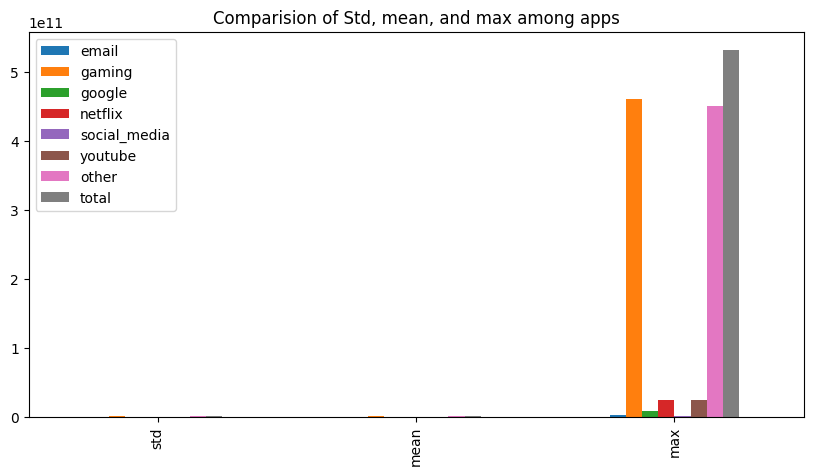

In [32]:
pd.DataFrame(total_data_volume.describe()).loc[["std","mean","max"]].plot(kind="bar",title="Comparision of Std, mean, and max among apps",figsize=(10,5))
plt.show()

### Task 2.2 

In [33]:
cleaned_df["social_media"] = cleaned_df["social_media_dl_(bytes)"] + cleaned_df['social_media_ul_(bytes)']
cleaned_df["google"] = cleaned_df["google_dl_(bytes)"] + cleaned_df["google_ul_(bytes)"]
cleaned_df['email'] = cleaned_df["email_dl_(bytes)"] + cleaned_df["email_ul_(bytes)"]
cleaned_df['youtube'] = cleaned_df["youtube_dl_(bytes)"] + cleaned_df["youtube_ul_(bytes)"]
cleaned_df['netflix'] = cleaned_df["netflix_dl_(bytes)"] + cleaned_df["netflix_ul_(bytes)"]
cleaned_df["gaming"] = cleaned_df["gaming_dl_(bytes)"] + cleaned_df["gaming_ul_(bytes)"]
cleaned_df['other']= cleaned_df["other_dl_(bytes)"]+ cleaned_df["other_ul_(bytes)"]
cleaned_df['total_data'] = cleaned_df['total_dl_(bytes)'] + cleaned_df['total_ul_(bytes)']

In [34]:
explore_feature_df=cleaned_df[[ 'msisdn/number', 'last_location_name',
                        'handset_manufacturer', 'handset_type', 'dur._(ms)', 
                        'social_media', 'google', 'email', 'youtube', 'netflix',
                        'gaming','other', 'total_data'
                    ]]

In [35]:
explore_feature_df=explore_feature_df.rename(columns={"msisdn/number":"msisdn","handset_manufacturer":"manufacturer","last_location_name":"location","dur._(ms)":"dur_ms"})
explore_feature_df.head()

,msisdn,location,manufacturer,handset_type,dur_ms,social_media,google,email,youtube,netflix,gaming,other,total_data
0,3.366496e+10,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,D42335A,Samsung,Samsung Galaxy A8 (2018),1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,T21824A,undefined,undefined,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,D88865A,Samsung,Samsung Sm-G390F,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


#### Non-graphical Univariate Analysis

In [36]:
quanititative_analysis= explore_feature_df[['dur_ms','email','google','gaming','netflix','social_media','youtube','other','total_data']]
quanititative_analysis.describe()

,dur_ms,email,google,gaming,netflix,social_media,youtube,other,total_data
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046084e+05,2.259102e+06,7.807295e+06,4.303331e+08,2.262861e+07,1.828250e+06,2.264348e+07,4.293653e+08,4.957646e+08
std,8.103736e+04,1.071109e+06,3.516420e+06,2.440199e+08,9.260820e+06,1.035646e+06,9.246800e+06,2.432681e+08,2.443810e+08
min,7.142000e+03,8.359000e+03,4.033000e+04,3.063580e+05,9.843200e+04,1.563000e+03,7.890300e+04,1.490450e+05,2.895611e+07
25%,5.744200e+04,1.359344e+06,4.943599e+06,2.187279e+08,1.597946e+07,9.322180e+05,1.599846e+07,2.185534e+08,2.844764e+08
50%,8.639900e+04,2.263567e+06,7.812835e+06,4.316150e+08,2.263554e+07,1.826471e+06,2.266177e+07,4.299865e+08,4.968610e+08
75%,1.324300e+05,3.159818e+06,1.068280e+07,6.414159e+08,2.929044e+07,2.727487e+06,2.929260e+07,6.399275e+08,7.065054e+08
max,1.859336e+06,4.518036e+06,1.552878e+07,8.592028e+08,4.519815e+07,3.650861e+06,4.519008e+07,8.595209e+08,9.559848e+08


#### Graphical Univariate Analysis

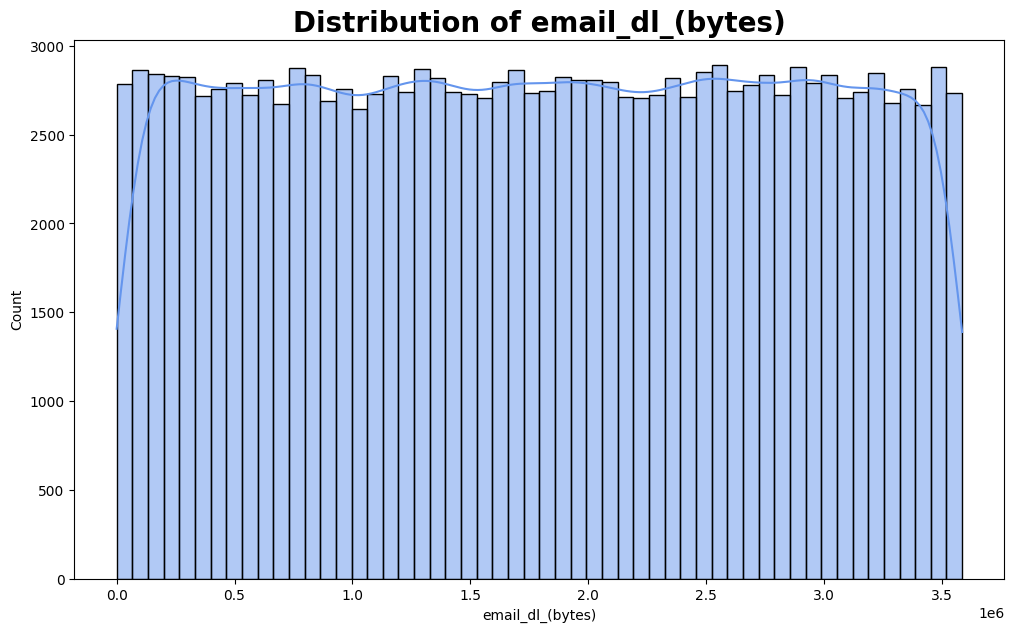

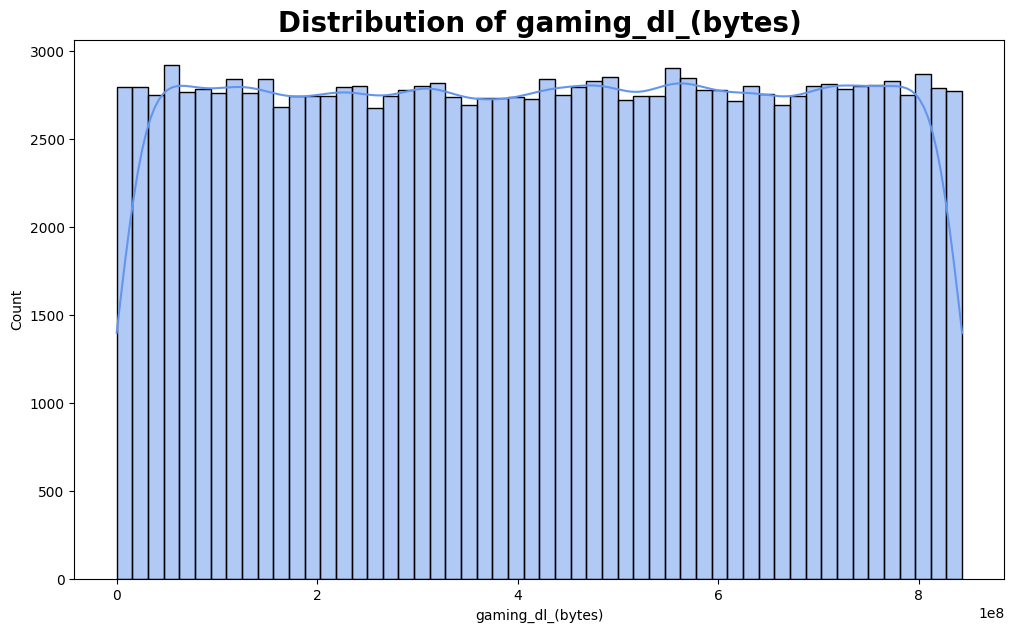

In [39]:
numeric_columns = cleaner.get_numerical_columns(cleaned_df)
numeric_df= cleaned_df[numeric_columns]
utility.plot_hist(numeric_df,'email_dl_(bytes)','cornflowerblue')
utility.plot_hist(numeric_df,'gaming_dl_(bytes)','cornflowerblue')
# utility.plot_hist(numeric_df,'email_dl_(bytes)','cornflowerblue')

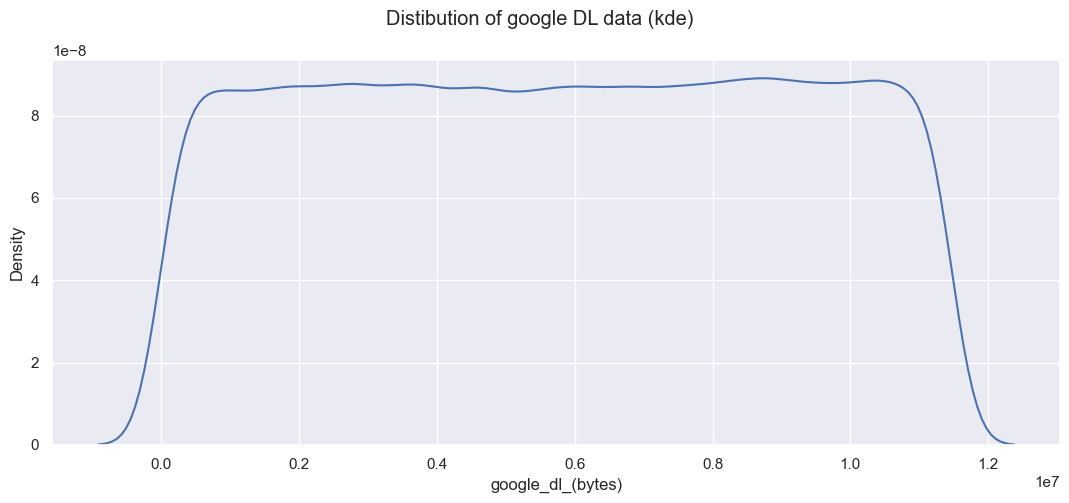

In [40]:
sns.set(rc={'figure.figsize':(13,5)})
sns.kdeplot(numeric_df["google_dl_(bytes)"])
plt.suptitle("Distibution of google DL data (kde)")
plt.show()

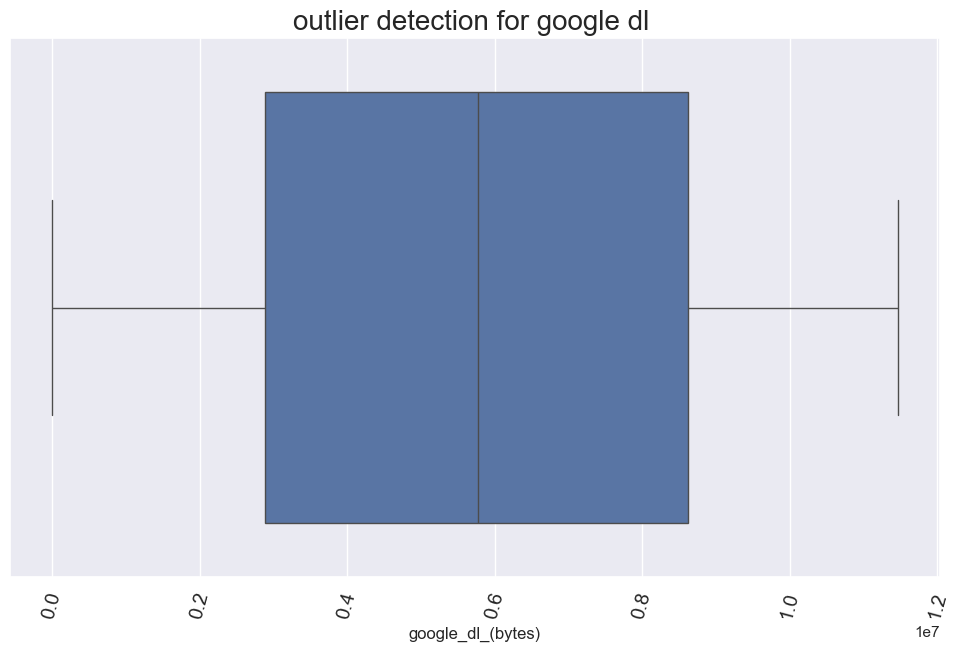

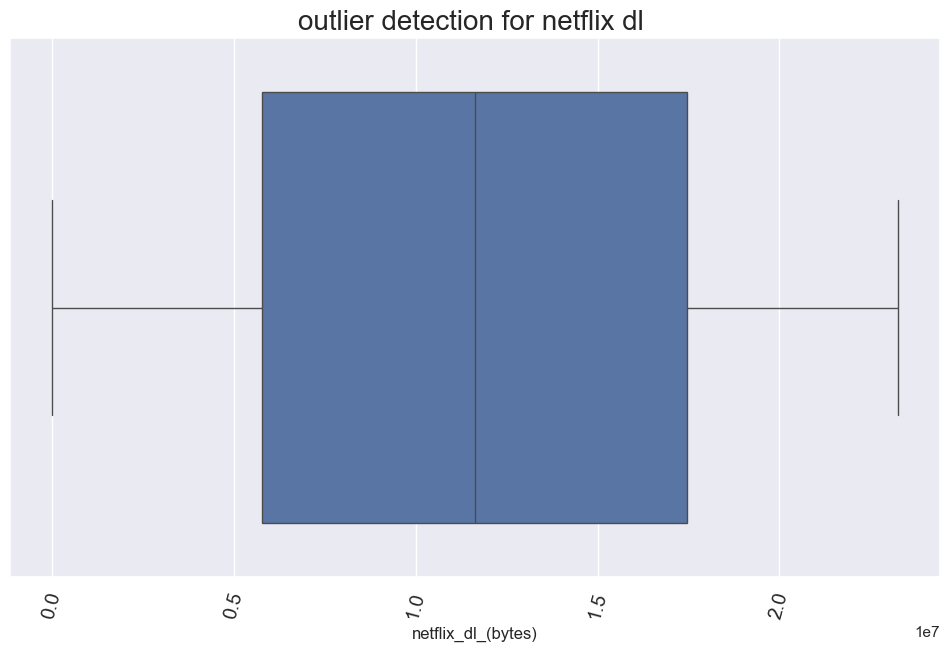

In [41]:
utility.plot_box(numeric_df,'google_dl_(bytes)','outlier detection for google dl ')
utility.plot_box(numeric_df,'netflix_dl_(bytes)','outlier detection for netflix dl ')

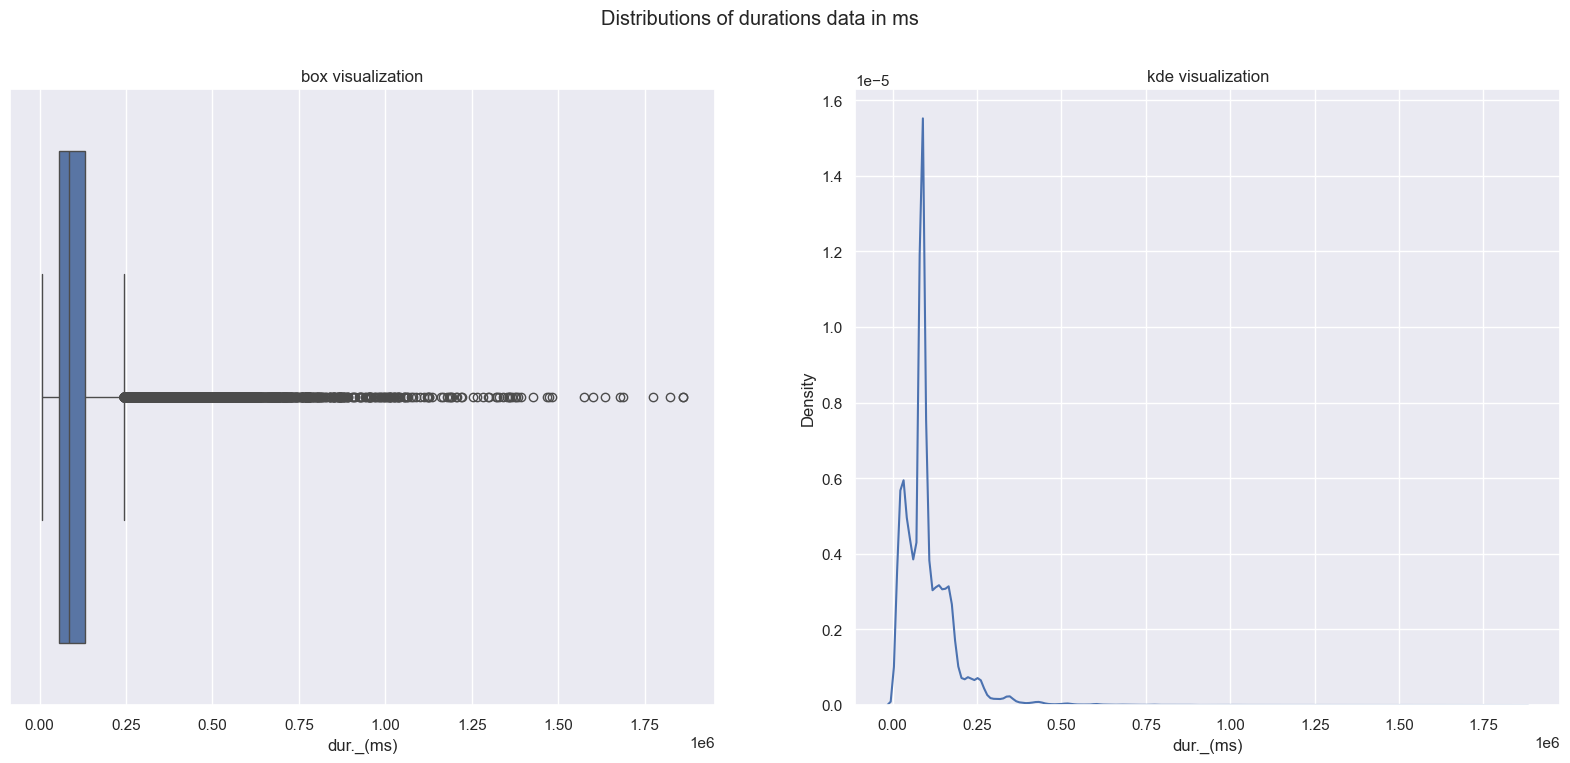

In [42]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1,title="box visualization")
sns.boxplot(data=numeric_df[['dur._(ms)']],x="dur._(ms)")
plt.subplot(1,2,2,title="kde visualization")
sns.kdeplot(numeric_df["dur._(ms)"])
plt.suptitle("Distributions of durations data in ms")
plt.show()

we can understand that from the above chart, there exists outliers in duration data

#### Bivariate Analysis

In [43]:
total_data_volume

,email,gaming,google,netflix,social_media,youtube,other,total
msisdn/number,,,,,,,,
3.366371e+10,2.403622e+09,4.616346e+11,8.250702e+09,2.428211e+10,1.974199e+09,2.435073e+10,4.516521e+11,5.319623e+11
3.361489e+10,4.078863e+07,7.749432e+09,1.279738e+08,3.614010e+08,2.829454e+07,3.943702e+08,7.639264e+09,8.846226e+09
3.376054e+10,3.369377e+07,7.461045e+09,1.232231e+08,3.346433e+08,3.978319e+07,3.962892e+08,4.716134e+09,8.514774e+09
3.362578e+10,4.063397e+07,7.326673e+09,1.423079e+08,3.569806e+08,2.713550e+07,4.529588e+08,6.354583e+09,8.499621e+09
3.362632e+10,4.241878e+07,6.887572e+09,1.521919e+08,3.287257e+08,4.337478e+07,3.744830e+08,8.167878e+09,7.971167e+09
...,...,...,...,...,...,...,...,...
3.367548e+10,7.534170e+05,5.847338e+06,1.609008e+06,4.610190e+06,6.144500e+04,2.427441e+07,1.782843e+08,3.802236e+07
3.378251e+10,9.645170e+05,1.185352e+07,1.585111e+06,8.340757e+06,1.441236e+06,1.100611e+07,3.796406e+08,3.792924e+07
3.366668e+10,2.576936e+06,1.980834e+06,4.339447e+06,1.743873e+07,7.506630e+05,3.927196e+06,2.987000e+08,3.399962e+07


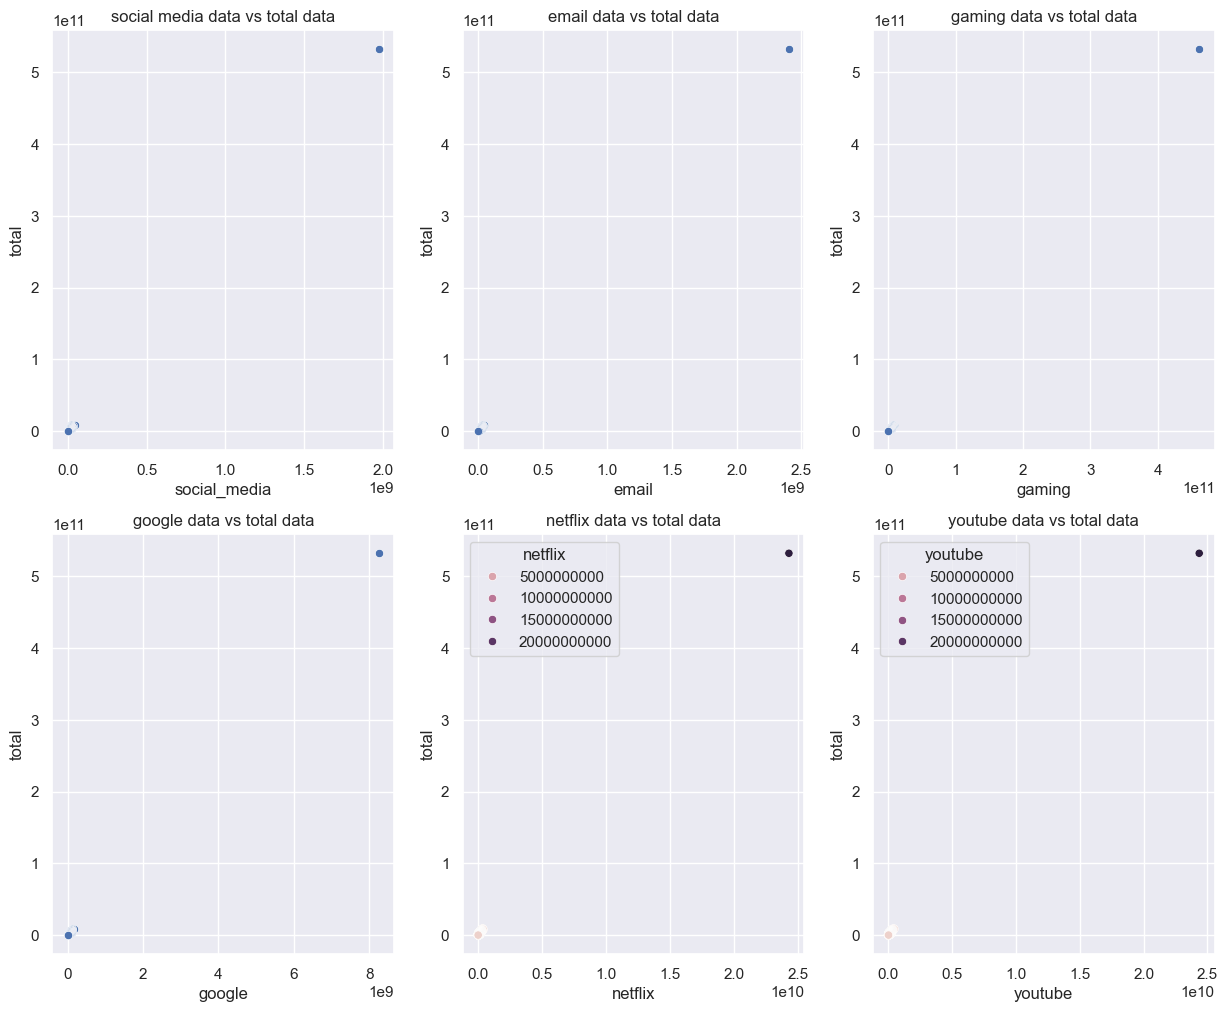

In [44]:
plt.figure(figsize=(15,12))
plt.subplot(2,3,1,title="social media data vs total data")
sns.scatterplot(data=total_data_volume,x="social_media",y="total",hue=None,style=None)

plt.subplot(2,3,2,title="email data vs total data")
sns.scatterplot(data=total_data_volume,x="email",y="total",hue=None,style=None)

plt.subplot(2,3,3,title="gaming data vs total data")
sns.scatterplot(data=total_data_volume,x="gaming",y="total",hue=None,style=None)

plt.subplot(2,3,4,title="google data vs total data")
sns.scatterplot(data=total_data_volume,x="google",y="total",hue=None)

plt.subplot(2,3,5,title="netflix data vs total data")
sns.scatterplot(data=total_data_volume,x="netflix",y="total",hue="netflix")

plt.subplot(2,3,6,title="youtube data vs total data")
sns.scatterplot(data=total_data_volume,x="youtube",y="total",hue="youtube")

plt.show()

#### variable transformations

In [45]:
explore_feature_df

,msisdn,location,manufacturer,handset_type,dur_ms,social_media,google,email,youtube,netflix,gaming,other,total_data
0,3.366496e+10,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,3.456294e+08
1,3.368185e+10,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,7.071854e+08
2,3.376063e+10,D42335A,Samsung,Samsung Galaxy A8 (2018),1361762.0,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,3.076910e+08
3,3.375034e+10,T21824A,undefined,undefined,1321509.0,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,8.893527e+08
4,3.369980e+10,D88865A,Samsung,Samsung Sm-G390F,1089009.0,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,D20434A,Apple,Apple iPhone 8 Plus (A1897),81230.0,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,6.318041e+08
149997,3.366345e+10,D10223C,Apple,Apple iPhone Se (A1723),97970.0,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,7.057839e+08
149998,3.362189e+10,T51102A,Apple,Apple iPhone Xs (A2097),98249.0,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,6.276986e+08
149999,3.361962e+10,L88342B,Huawei,Huawei Fig-Lx1,97910.0,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,4.015220e+08


In [46]:
from sklearn.preprocessing import MinMaxScaler


scaled_explore_feature_df = explore_feature_df[['msisdn', 'total_data', 'dur_ms']]

scaled_explore_feature_df['dur_ms'] = explore_feature_df['dur_ms'] /1000

scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'dur_ms': 'duration'})

scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('msisdn').agg({'duration':'sum', 'total_data': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('decile').agg({'total_data': 'sum',
                                                                                           'duration': 'sum'})
explore_feature_df_with_decile_agg

C:\Users\user\AppData\Local\Temp\ipykernel_3076\1866902162.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,total_data,duration
decile,,
1st_decile,1.154869e+13,644345.106
2nd_decile,1.257064e+13,1807896.025
3rd_decile,1.157014e+13,2124992.603
4th_decile,1.397433e+13,3448477.202
5th_decile,2.470138e+13,7665659.515


Text(0, 0.5, 'duration ')

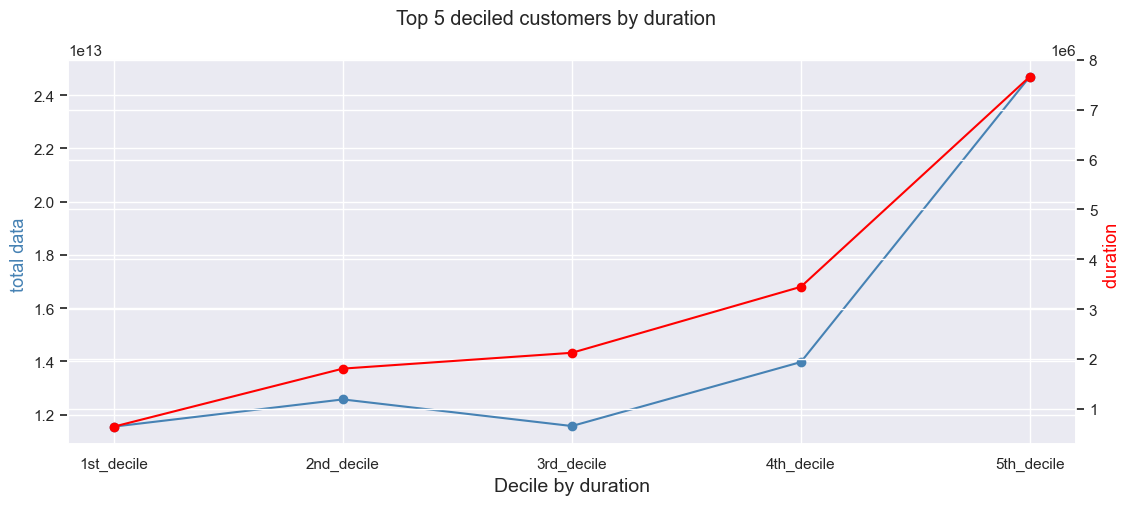

In [47]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

# explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 deciled customers by duration').set_xlabel("Decile By Duration")

#add first line to plot
ax.plot(explore_feature_df_with_decile_agg[["total_data"]], color=col1,linestyle='-', marker='o')

#add x-axis label
ax.set_xlabel('Decile by duration', fontsize=14)

#add y-axis label
ax.set_ylabel('total data ', color=col1, fontsize=13)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(explore_feature_df_with_decile_agg[["duration"]], color=col2,linestyle='-', marker='o')

plt.suptitle("Top 5 deciled customers by duration")
#add second y-axis label
ax2.set_ylabel('duration ', color=col2, fontsize=13)

#### Correlation

In [48]:
total_data = explore_feature_df[['social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other']]

In [49]:
data_correlation = total_data.corr()
data_correlation

,social_media,google,email,youtube,netflix,gaming,other
social_media,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
google,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
email,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
youtube,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
netflix,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
gaming,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
other,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


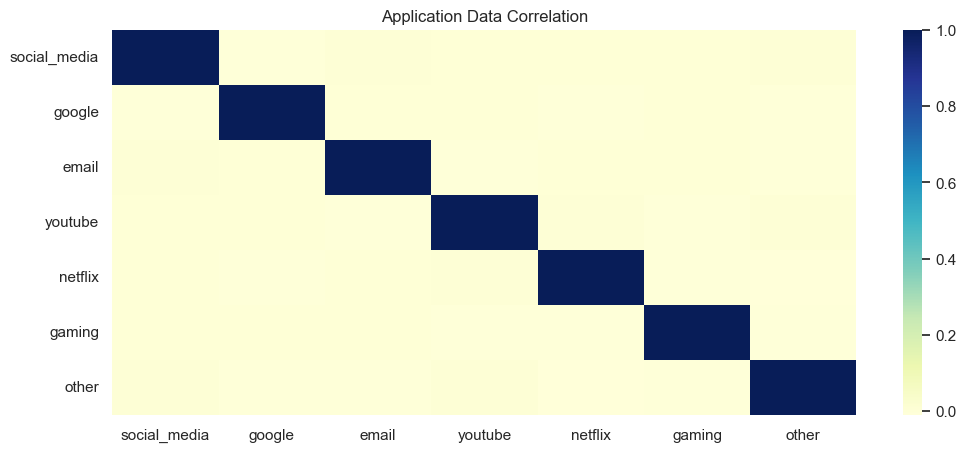

In [50]:
plt.figure(figsize=(12,5))
sns.heatmap(data_correlation,cmap="YlGnBu")
plt.title("Application Data Correlation")
plt.show()

#### Dimensionality Reduction

In [52]:
# Drop any non-numeric columns
numeric_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [53]:
# number of components
n_components = 2 

# Create PCA instance
pca = PCA(n_components=n_components)

# Fit and transform the scaled data
pca_result = pca.fit_transform(scaled_data)


Explained Variance: [0.14281409 0.06894961]


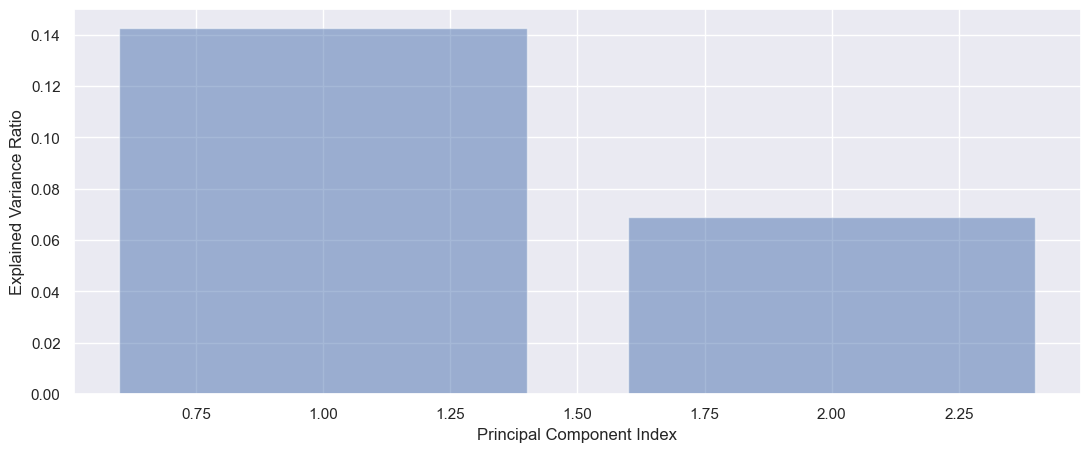

In [54]:
# Check the explained variance to understand how much information is retained by each principal component.

explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

# Plotting the explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [55]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_df

,PC1,PC2
0,-3.871753,1.243429
1,-3.156006,-1.658679
2,-3.176818,1.554164
3,-3.149945,-3.170990
4,-2.788335,-0.865895
...,...,...
149996,-1.429900,-1.077287
149997,-1.439887,-1.719104
149998,-1.381102,-1.078677
149999,-0.976782,0.745949
